WALDO RIVIER
17.06.2018 
Exercices du module 1 Applied Data Science: Machine Learning

In [54]:
import os

from pathlib import PureWindowsPath
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns

décomposition du score de bonheur par critère; forme stack bar 
fonction utilisée plus bas

In [35]:
def plot_stack_bar (df, title) :

    x = df['Country']
    x_pos = np.arange(len(x))

    y = df['Happiness Score']
       
    fig, a2 = plt.subplots()
    a2.set_xticks(x_pos)
    a2.set_xticklabels(x, rotation=90)

    for i in range(3, 10) :
        ci = df.iloc[:,i]
        if i == 3 :
            a2.bar(x_pos, ci, color = 'silver')
            c = ci
        else :
            a2.bar(x_pos, ci, bottom = c)
            c = c + ci

    a2.legend(labels=df_hap_10.columns[3:10], loc="upper right", bbox_to_anchor=(1.2, 1))
    a2.set_xlabel('Country')
    a2.set_ylabel('Happiness Score')
    a2.set_title(title)
    plt.show()

lecture du fichier contenant les données du World

In [36]:
working_dir = PureWindowsPath(os.getcwd())
data_dir = PureWindowsPath(working_dir.joinpath('Data'))
data_file = PureWindowsPath(data_dir.joinpath('data.csv'))
df = pd.read_csv(data_file.as_posix())

inspection des données

In [37]:
 df.info()
 df.columns
 df.dtypes

 df.count()
 df.dropna(inplace=True)
 df.count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 12 columns):
Country             153 non-null object
Happiness Rank      153 non-null int64
Happiness Score     153 non-null float64
Economy             153 non-null float64
Family              153 non-null float64
Health              153 non-null float64
Freedom             153 non-null float64
Generosity          153 non-null float64
Corruption          153 non-null float64
Dystopia            153 non-null float64
Job Satisfaction    151 non-null float64
Region              153 non-null object
dtypes: float64(9), int64(1), object(2)
memory usage: 14.4+ KB


Country             151
Happiness Rank      151
Happiness Score     151
Economy             151
Family              151
Health              151
Freedom             151
Generosity          151
Corruption          151
Dystopia            151
Job Satisfaction    151
Region              151
dtype: int64

selection des colonnes de type numérique dont on produit une copie

In [38]:
 df_num_col = df.select_dtypes(include=['float64', 'int64']).copy()

 Max value from numerical columns :

In [39]:
df_num_col.max()

Happiness Rank      155.000000
Happiness Score       7.537000
Economy               1.870766
Family                1.610574
Health                0.949492
Freedom               0.658249
Generosity            0.838075
Corruption            0.464308
Dystopia              3.117485
Job Satisfaction     95.100000
dtype: float64

Min value from numerical columns :

In [40]:
df_num_col.min()

Happiness Rank       1.000000
Happiness Score      2.693000
Economy              0.000000
Family               0.000000
Health               0.000000
Freedom              0.000000
Generosity           0.000000
Corruption           0.000000
Dystopia             0.377914
Job Satisfaction    44.400000
dtype: float64

In [41]:
df_hap_asc = df.sort_values(by = 'Happiness Rank', ascending = True)

les 10 pays les + "heureux"

In [42]:
df_hap_asc.head(10)

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,94.6,Western Europe
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,93.5,Western Europe
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,94.5,Western Europe
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,93.7,Western Europe
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,91.2,Western Europe
5,Netherlands,6,7.377,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804,93.8,Western Europe
6,Canada,7,7.316,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264,90.5,North America
7,New Zealand,8,7.314,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456,88.6,Asia-Pacific
8,Sweden,9,7.284,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538,92.7,Western Europe
9,Australia,10,7.284,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211,89.2,Asia-Pacific


les 10 pays les - "heureux"

In [43]:
df_hap_desc = df.sort_values(by = 'Happiness Rank', ascending = False)
df_hap_desc.head(10)

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
152,Central African Republic,155,2.693,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005,70.4,Africa
151,Burundi,154,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024,54.3,Africa
150,Tanzania,153,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,57.8,Africa
149,Syria,152,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,62.7,Asia-Pacific
148,Rwanda,151,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,51.7,Africa
147,Togo,150,3.495,0.305445,0.431883,0.247106,0.380426,0.196896,0.095665,1.837229,44.8,Africa
146,Guinea,149,3.507,0.244550,0.791245,0.194129,0.348588,0.264815,0.110938,1.552312,55.1,Africa
145,Liberia,148,3.533,0.119042,0.872118,0.229918,0.332881,0.266550,0.038948,1.673286,56.6,Africa
143,Yemen,146,3.593,0.591683,0.935382,0.310081,0.249464,0.104125,0.056767,1.345601,58.9,Asia-Pacific
142,Haiti,145,3.603,0.368610,0.640450,0.277321,0.030370,0.489204,0.099872,1.697168,48.5,Latin America


suppression de la région Europe compte tenu que des sous-régions sont définies

In [44]:
df_region = df.copy()
df_region.set_index(['Region'], inplace=True)
df_region.drop(['Europe'], axis=0, inplace=True)

définition d'une variable décrivant le groupe by

In [45]:
ser_region_group = df_region.groupby(['Region'])['Happiness Score']

moyenne des scores de bonheur par région :

In [46]:
ser_region_hap = ser_region_group.mean()
ser_region_hap.sort_values(ascending=False)

Region
North America     7.154500
Western Europe    6.880474
Latin America     5.957818
Eastern Europe    5.498952
Asia-Pacific      5.358326
Africa            4.254581
Name: Happiness Score, dtype: float64

nombre de pays, par région, qui font un score > 6 :

In [47]:
score_above_6 = df_region['Happiness Score'] > 6
df_region_f = df_region[score_above_6]
ser_nb_region_f = df_region_f.groupby(['Region'])['Happiness Score']
ser_nb_region_f.count()

Region
Asia-Pacific      11
Eastern Europe     1
Latin America     13
North America      2
Western Europe    17
Name: Happiness Score, dtype: int64

distance, par région, entre le score le max et le score min :

In [48]:
ser_dist_score = ser_region_group.max() - ser_region_group.min()
ser_dist_score.sort_values(ascending=False)

Region
Asia-Pacific      3.852
Latin America     3.476
Africa            3.179
Western Europe    2.342
Eastern Europe    1.454
North America     0.323
Name: Happiness Score, dtype: float64

région avec la distance maximum entre le score le max et le score min :

In [49]:
ser_dist_score.head(1)

Region
Africa    3.179
Name: Happiness Score, dtype: float64

GRAPHIQUE les 10 + bar plot horizontal

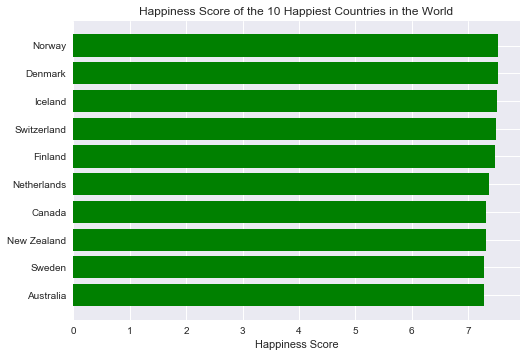

In [55]:
 df_hap_10 = df_hap_asc.head(10)
 y = df_hap_10['Country']
 y_pos = np.arange(len(y))
 x = df_hap_10['Happiness Score']
 
 fig, a1 = plt.subplots()
 a1.barh(np.arange(len(y)), x, align='center', color='green', ecolor='black')
 a1.set_yticks(y_pos)
 a1.set_yticklabels(y)
 a1.invert_yaxis()  
 a1.set_xlabel('Happiness Score')
 a1.set_title('Happiness Score of the 10 Happiest Countries in the World')
 plt.show()

GRAPHIQUE les 10 + bar plot vertical 
Décomposition par critère

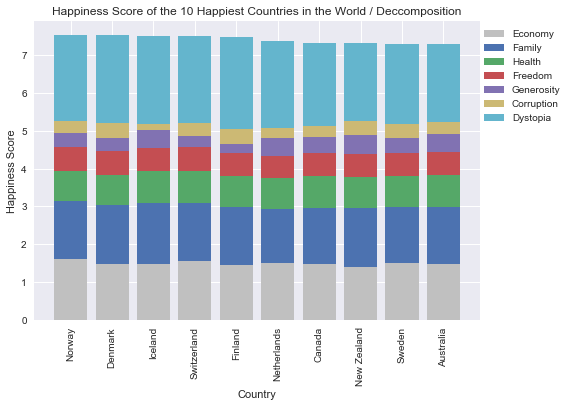

In [51]:
plot_stack_bar (df_hap_10, 'Happiness Score of the 10 Happiest Countries in the World / Deccomposition')

Sélectionner tous les pays de la région 'Afrique'

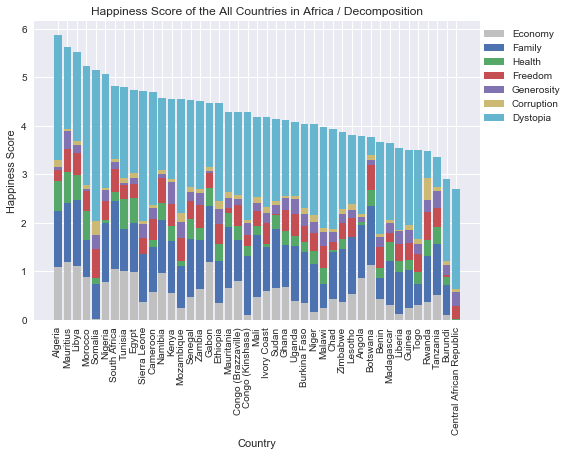

In [52]:
region = 'Africa'
f_region = df['Region']==region
df_r = df[f_region]
df_r.sort_values(by = 'Happiness Rank', ascending = True)
plot_stack_bar (df_r, 'Happiness Score of the All Countries in ' + region + ' / Decomposition')

Histogramme par JOB Satisfaction 

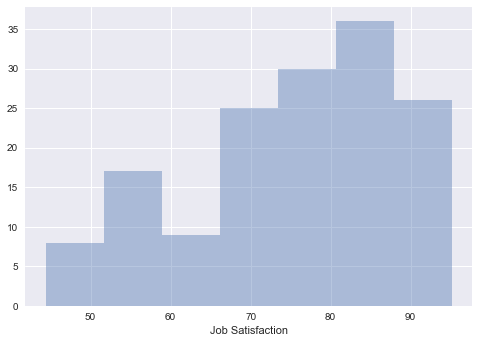

In [56]:
sns.distplot(df['Job Satisfaction'], bins=7, kde=False, norm_hist=False)
plt.show()

Pairwise Scatter PLOT

--------------------------------

Des variables "numérique", on retire "Happiness Score";
on construit alors les comparaisons entre chacune de ces variables 
et "Happiness Score"  
   

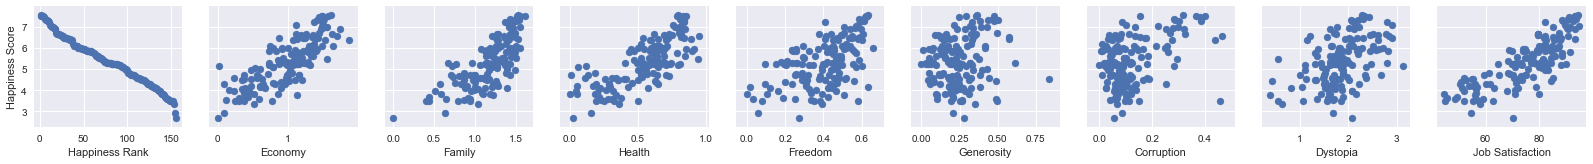

In [57]:
comparison_vars = df_num_col.drop(['Happiness Score'], axis=1).columns.values
g = sns.PairGrid(df, x_vars=comparison_vars, y_vars=["Happiness Score"])
g = g.map(plt.scatter)
plt.show()

Correlation 
Meilleure correlation avec "Happiness Score" : 

In [59]:
hap_score_corr_values = df.corr()['Happiness Score'].sort_values(ascending=False)
hap_score_corr_values.drop(['Happiness Score'], inplace = True)
hap_score_corr_values.head(1)

Job Satisfaction    0.812873
Name: Happiness Score, dtype: float64

Probabilité :

In [73]:
df_west_europe_above_6 = df[df['Region']=='Western Europe']
df_west_europe_above_6 = df_west_europe_above_6[df_west_europe_above_6['Happiness Score'] > 6]
df_world_above_6 = df[df['Happiness Score'] > 6]
prob = df_west_europe_above_6.Country.count() / df_world_above_6.Country.count()
print('Probabilité que parmi les pays avec un "Happiness Score" > 6, celui-ci soit de l' 'Europe de l' 'ouest')
prob

Probabilité que parmi les pays avec un "Happiness Score" > 6, celui-ci soit de lEurope de louest


0.38636363636363635

Matrice :

function lambda pour convertir en 0 ou 1 les éléments d'une série si 
l'élément est égal / différent de r

In [76]:
def f_region(r) :
    def f(x) :
        b = 0
        if x == r :
            b = 1
        else : 
            b = 0
        return b
    return f

In [78]:
df_countries = df.copy()
df_countries = df.set_index(['Country'])
ser_country_region = df_countries['Region']
for r in ser_country_region.unique() :
    # on ajoute une colonne pour chaque région dans laquelle on associe les régions
       
    df_countries[r] = ser_country_region.values
    # pour chacune des colonnes, on masque les régions qui ne correspondent pas
    # au "titre" de cette colonne (i.e colonne 'Africa'-> toutes les régions de
    # on fait appel a une fonction type lambda
    df_countries[r] = df_countries[r].apply(f_region(r))
        
df_countries.as_matrix(columns=ser_country_region.unique())

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0]], dtype=int64)